<a href="https://colab.research.google.com/github/alyssapalms/Assignment11/blob/main/Assignment_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import Bunch
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from skimage.io import imread
from skimage.transform import resize
import joblib
import os

Load Images

In [3]:
def load_image_files(container_path, dimension=(64, 64)):
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]

    images = []
    flat_data = []
    target = []

    for i, direc in enumerate(folders):
        for file in direc.iterdir():
            img = imread(file)
            img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
            flat_data.append(img_resized.flatten())
            images.append(img_resized)
            target.append(i)

    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)

    return Bunch(data=flat_data,
                 target=target,
                 target_names=categories,
                 images=images)

Load dataset

Archive:  /content/images.zip
   creating: /content/images/
   creating: /content/images/dalmatian/
  inflating: /content/images/dalmatian/image_0001.jpg  
  inflating: /content/images/dalmatian/image_0002.jpg  
  inflating: /content/images/dalmatian/image_0003.jpg  
  inflating: /content/images/dalmatian/image_0004.jpg  
  inflating: /content/images/dalmatian/image_0005.jpg  
  inflating: /content/images/dalmatian/image_0006.jpg  
  inflating: /content/images/dalmatian/image_0007.jpg  
  inflating: /content/images/dalmatian/image_0008.jpg  
  inflating: /content/images/dalmatian/image_0009.jpg  
  inflating: /content/images/dalmatian/image_0010.jpg  
  inflating: /content/images/dalmatian/image_0011.jpg  
  inflating: /content/images/dalmatian/image_0012.jpg  
  inflating: /content/images/dalmatian/image_0013.jpg  
  inflating: /content/images/dalmatian/image_0014.jpg  
  inflating: /content/images/dalmatian/image_0015.jpg  
  inflating: /content/images/dalmatian/image_0016.jpg  
  in

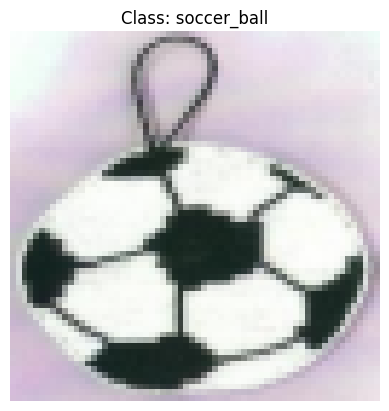

In [4]:
# Unzip your uploaded images.zip
!unzip /content/images.zip -d /content/

# Set folder path
image_folder = "/content/images"

# Load dataset
image_dataset = load_image_files(image_folder)

print("Number of images:", len(image_dataset.images))
print("Image shape:", image_dataset.images[0].shape)
print("Classes:", image_dataset.target_names)

plt.imshow(image_dataset.images[0])
plt.title(f"Class: {image_dataset.target_names[image_dataset.target[0]]}")
plt.axis("off")
plt.show()

Train

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    image_dataset.data,
    image_dataset.target,
    test_size=0.3,
    random_state=42
)

GridSearchCV

In [6]:
param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [None, 10],
    "min_samples_split": [2, 5]
}

rf = RandomForestClassifier()

clf = GridSearchCV(rf, param_grid)
clf.fit(X_train, y_train)

print("Best parameters:", clf.best_params_)

Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


Predictions

In [7]:
y_pred = clf.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

print("Classification Report:")
print(metrics.classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

joblib.dump(clf.best_estimator_, "rf_image_model.pkl")
print("Model saved successfully!")

Accuracy: 0.7419354838709677
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.53      0.57        15
           1       0.75      0.63      0.69        19
           2       0.71      0.77      0.74        22
           3       0.75      0.80      0.77        15
           4       0.83      0.91      0.87        22

    accuracy                           0.74        93
   macro avg       0.73      0.73      0.73        93
weighted avg       0.74      0.74      0.74        93

Confusion Matrix:
[[ 8  1  4  2  0]
 [ 1 12  2  0  4]
 [ 2  1 17  2  0]
 [ 2  0  1 12  0]
 [ 0  2  0  0 20]]
Model saved successfully!
